In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('DC_Properties.csv')

data.head()

C:\Users\steph\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [29]:
data["SOURCE"] = "Residential"
data["QUALIFIED"] = 'Q'
data_limited = data[(data['STORIES'] < 6) & (data['PRICE'] >99000) & (data['PRICE'] <6000000) & (data['SALEDATE'] > '2013-07-01')]

data_viz = data_limited.drop(['NUM_UNITS','AYB','YR_RMDL','SALE_NUM','BLDG_NUM','GIS_LAST_MOD_DTTM','CMPLX_NUM','LIVING_GBA','NATIONALGRID'], axis=1)

data_ml = data_limited.drop(['NUM_UNITS','AYB','YR_RMDL','SALE_NUM','BLDG_NUM','GIS_LAST_MOD_DTTM','CMPLX_NUM','LIVING_GBA','CITY',
                    'STATE','NATIONALGRID','FULLADDRESS','ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','CENSUS_TRACT','CENSUS_BLOCK',
                    'WARD','SQUARE','X','Y','SOURCE','QUALIFIED','Unnamed: 0','LATITUDE','LONGITUDE', 'STYLE'], axis=1)

In [30]:
encoding = {'GRADE':{'Very Good':4, 'Above Average':6, 'Good Quality':3, 'Excellent':8, 'Average':5, 'Superior':7,
                     'Fair Quality':2, 'Exceptional-D':12, 'Exceptional-C':11, 'Low Quality':1, 'Exceptional-A':9,
                     'Exceptional-B':10, 'No Data':0},
            'CNDTN':{'Good':4, 'Very Good':5, 'Average':3, 'Fair':2, 'Excellent':6, 'Poor':1, 'Default':0}}

data_ml.replace(encoding, inplace=True)

data_ml

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,...,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,QUADRANT
2,3,1,Hot Water Rad,Y,9,5,1984,3.0,2016-06-21 00:00:00,2100000.0,...,5,Common Brick,Built Up,Hardwood,2.0,4,24,1680,20009.0,NW
8,3,1,Warm Cool,Y,7,3,1967,2.0,2018-05-03 00:00:00,1430000.0,...,5,Common Brick,Built Up,Hardwood,2.0,1,24,1424,20009.0,NW
29,3,1,Forced Air,Y,11,3,1984,3.0,2013-12-11 00:00:00,1210000.0,...,5,Common Brick,Built Up,Hardwood,2.0,3,11,1853,20009.0,NW
41,3,1,Warm Cool,Y,9,4,1967,3.0,2016-09-14 00:00:00,1550000.0,...,5,Common Brick,Metal- Sms,Hardwood,2.0,2,24,1853,20009.0,NW
42,3,1,Forced Air,Y,9,4,1967,3.0,2015-09-16 00:00:00,1599900.0,...,4,Common Brick,Built Up,Hardwood,2.0,2,24,1853,20009.0,NW
43,3,1,Forced Air,Y,13,4,1967,3.0,2018-03-30 00:00:00,1700000.0,...,6,Common Brick,Metal- Sms,Hardwood,2.0,3,24,1853,20009.0,NW
44,3,2,Forced Air,Y,10,4,1967,3.0,2017-05-01 00:00:00,1700000.0,...,5,Common Brick,Built Up,Hardwood,2.0,2,24,1853,20009.0,NW
62,4,2,Elec Base Brd,Y,11,5,1978,4.0,2014-03-05 00:00:00,1599000.0,...,4,Common Brick,Built Up,Hardwood/Carp,3.0,0,24,950,20009.0,NW
72,4,2,Warm Cool,Y,8,3,1964,2.0,2014-10-08 00:00:00,993500.0,...,5,Common Brick,Built Up,Hardwood,1.0,1,11,814,20009.0,NW
78,2,1,Warm Cool,Y,11,4,1990,2.0,2013-10-30 00:00:00,1155000.0,...,5,Common Brick,Built Up,Hardwood,2.0,2,24,1183,20009.0,NW


In [31]:
data_ml_dummy = pd.get_dummies(data_ml, columns=['HEAT','AC','STRUCT','EXTWALL','ROOF','INTWALL','USECODE','ZIPCODE','QUADRANT'])
data_ml_dummy

,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,GBA,GRADE,...,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
2,3,1,9,5,1984,3.0,2016-06-21 00:00:00,2100000.0,2522.0,4,...,0,0,0,0,0,0,0,1,0,0
8,3,1,7,3,1967,2.0,2018-05-03 00:00:00,1430000.0,1488.0,6,...,0,0,0,0,0,0,0,1,0,0
29,3,1,11,3,1984,3.0,2013-12-11 00:00:00,1210000.0,2520.0,6,...,0,0,0,0,0,0,0,1,0,0
41,3,1,9,4,1967,3.0,2016-09-14 00:00:00,1550000.0,2552.0,6,...,0,0,0,0,0,0,0,1,0,0
42,3,1,9,4,1967,3.0,2015-09-16 00:00:00,1599900.0,2520.0,6,...,0,0,0,0,0,0,0,1,0,0
43,3,1,13,4,1967,3.0,2018-03-30 00:00:00,1700000.0,2382.0,6,...,0,0,0,0,0,0,0,1,0,0
44,3,2,10,4,1967,3.0,2017-05-01 00:00:00,1700000.0,2520.0,6,...,0,0,0,0,0,0,0,1,0,0
62,4,2,11,5,1978,4.0,2014-03-05 00:00:00,1599000.0,3162.0,8,...,0,0,0,0,0,0,0,1,0,0
72,4,2,8,3,1964,2.0,2014-10-08 00:00:00,993500.0,1148.0,5,...,0,0,0,0,0,0,0,1,0,0
78,2,1,11,4,1990,2.0,2013-10-30 00:00:00,1155000.0,1380.0,5,...,0,0,0,0,0,0,0,1,0,0


In [8]:
data_ml_dummy.to_csv('Clean_DC_data.csv')

In [32]:
data_ml_dummy['SALEDATE']=pd.to_datetime(data_ml_dummy['SALEDATE']).dt.year
data_ml_dummy = data_ml_dummy.dropna()

In [33]:
X = data_ml_dummy.drop('PRICE', axis=1).values
y = data_ml_dummy["PRICE"].values.reshape(-1, 1)

print(X.shape, y.shape)

(21652, 116) (21652, 1)


In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import NuSVR, LinearSVR

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# for n in range(2, 31, 2):
#     pca = PCA(n_components=n)

#     pca.fit(X_train_scaled)

#     X_train_pca = pca.transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
#     print(n)
#     modelMaker(df_ml_dummy, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()])

C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
    global X_train_pca, X_test_pca, y_train, y_test
    try:
        assert len(models) > 0

    except:
        models = [models]

    for model in models:
        print("Fitting "+str(model).split("(")[0])

        print("R^2: "+ str((X_test, y_test)))
        
        for n in range(2, 41, 2):
            pca = PCA(n_components=n)

            # note, y is optional here
            pca.fit(X_train_scaled)
            X_train_pca=pca.transform(X_train_scaled)
            X_test_pca =pca.transform(X_test_scaled)
            model.fit(X_train_pca, y_train)

            print()
            print("n: "+ str(n))

            print("R^2: "+ str(model.score(X_test_pca, y_test)))
            
modelMaker(data_ml_dummy, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet()])

Fitting LinearRegression
R^2: (array([[ 2.,  0.,  6., ...,  1.,  0.,  0.],
       [ 3.,  0.,  7., ...,  0.,  0.,  0.],
       [ 4.,  2., 11., ...,  1.,  0.,  0.],
       ...,
       [ 3.,  2.,  8., ...,  1.,  0.,  0.],
       [ 1.,  1.,  7., ...,  0.,  0.,  0.],
       [ 4.,  0., 16., ...,  0.,  0.,  0.]]), array([[ 750000.],
       [ 485000.],
       [1594000.],
       ...,
       [ 735000.],
       [ 360000.],
       [ 824900.]]))

n: 2
R^2: 0.37855463080328616

n: 4
R^2: 0.564059650602549

n: 6
R^2: 0.5665991700768136

n: 8
R^2: 0.5699255272420725

n: 10
R^2: 0.6188351100183618

n: 12
R^2: 0.6242710536543941

n: 14
R^2: 0.6315250456460981

n: 16
R^2: 0.6520166205247809

n: 18
R^2: 0.6345286557353442

n: 20
R^2: 0.6493101176217375

n: 22
R^2: 0.6519562099823253

n: 24
R^2: 0.6440754558907814

n: 26
R^2: 0.657403186467937

n: 28
R^2: 0.6608914372644477

n: 30
R^2: 0.6604247320179921

n: 32
R^2: 0.67260194317904

n: 34
R^2: 0.6690867623383655

n: 36
R^2: 0.6651438016596849

n: 38
R^2: 

In [13]:
# def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
#     global X_train_pca, X_test_pca, y_train, y_test
    
#     try:
#         assert len(models) > 0
#     except:
#         models = [models]
    
#     for model in models:
#         print("Fitting "+str(model).split("(")[0])
#         model.fit(X_train_pca, y_train)
#         print("R^2: "+ str(model.score(X_test_pca, y_test)))

In [35]:
# does one use a different model and kernel than SVC and linear?
# SVC model/ GridSearch/Hyper parameter optimzation
# Create the SVC Model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = SVR(kernel='linear')
# model

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
             'kernel': ['rbf', 'poly', 'sigmoid', 'precomputed' ]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [15]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_pca, y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, score=-0.04191516882372026, total=  12.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s
C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, score=-0.033835239024311736, total=  12.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.1s remaining:    0.0s
C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, score=-0.036658835656236066, total=  12.8s
[CV] C=1, gamma=0.0001, kernel=poly ..................................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=poly, score=-0.04193312224706003, total=  10.1s
[CV] C=1, gamma=0.0001, kernel=poly ..................................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=poly, score=-0.03385528981848451, total=  10.3s
[CV] C=1, gamma=0.0001, kernel=poly ..................................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=poly, score=-0.03667631561665119, total=  10.7s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=-0.04192396405814702, total=  14.5s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=-0.03384510553028486, total=  14.6s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................


C:\Users\steph\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=-0.03666742171600279, total=  14.8s
[CV] C=1, gamma=0.0001, kernel=precomputed ...........................


ValueError: X should be a square kernel matrix

In [ ]:
# List the best parameters for this dataset
print(grid.best_params_)

In [16]:
# write csv for 
data_viz.to_csv('realestatevisual.csv')

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
#K Nearest neighbors; renders but low test scores
train_scores = []
test_scores = []
for k in range(2, 40, 2):
   knn = KNeighborsRegressor(n_neighbors=k)
   knn.fit(X_train_scaled, y_train)
   train_score = knn.score(X_train_scaled, y_train)
   test_score = knn.score(X_test_scaled, y_test)
   train_scores.append(train_score)
   test_scores.append(test_score)
   print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 2, Train/Test Score: 0.912/0.725
k: 4, Train/Test Score: 0.854/0.763
k: 6, Train/Test Score: 0.831/0.777
k: 8, Train/Test Score: 0.814/0.777
k: 10, Train/Test Score: 0.800/0.772
k: 12, Train/Test Score: 0.791/0.769
k: 14, Train/Test Score: 0.781/0.767
k: 16, Train/Test Score: 0.773/0.762
k: 18, Train/Test Score: 0.766/0.757
k: 20, Train/Test Score: 0.759/0.753
k: 22, Train/Test Score: 0.754/0.750
k: 24, Train/Test Score: 0.748/0.746
k: 26, Train/Test Score: 0.743/0.741
k: 28, Train/Test Score: 0.738/0.737
k: 30, Train/Test Score: 0.734/0.732
k: 32, Train/Test Score: 0.729/0.729
k: 34, Train/Test Score: 0.726/0.724
k: 36, Train/Test Score: 0.722/0.722
k: 38, Train/Test Score: 0.718/0.719


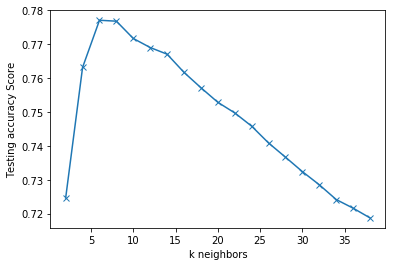

In [42]:
# plot the test and train scores
# plt.plot(range(2, 40, 2), train_scores, marker='o')
plt.plot(range(2, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show() 

In [43]:

train_scores = []
test_scores = []
for k in range(2, 40, 2):
   knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
   knn.fit(X_train_scaled, y_train)
   train_score = knn.score(X_train_scaled, y_train)
   test_score = knn.score(X_test_scaled, y_test)
   train_scores.append(train_score)
   test_scores.append(test_score)
   print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 2, Train/Test Score: 1.000/0.733
k: 4, Train/Test Score: 1.000/0.769
k: 6, Train/Test Score: 1.000/0.782
k: 8, Train/Test Score: 1.000/0.782
k: 10, Train/Test Score: 1.000/0.777
k: 12, Train/Test Score: 1.000/0.777
k: 14, Train/Test Score: 1.000/0.776
k: 16, Train/Test Score: 1.000/0.773
k: 18, Train/Test Score: 1.000/0.770
k: 20, Train/Test Score: 1.000/0.767
k: 22, Train/Test Score: 1.000/0.765
k: 24, Train/Test Score: 1.000/0.763
k: 26, Train/Test Score: 1.000/0.760
k: 28, Train/Test Score: 1.000/0.756
k: 30, Train/Test Score: 1.000/0.754
k: 32, Train/Test Score: 1.000/0.751
k: 34, Train/Test Score: 1.000/0.747
k: 36, Train/Test Score: 1.000/0.745
k: 38, Train/Test Score: 1.000/0.743


TypeError: 'type' object is not subscriptable